<a href="https://colab.research.google.com/github/aruntahilramani/134_ArunTahilramani/blob/master/Lab%2010/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

from sklearn.model_selection import train_test_split

11501568/11490434 [==============================] - 0s 0us/step


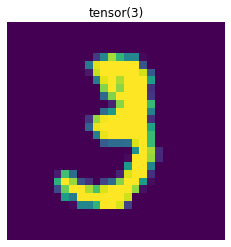

In [2]:
from tensorflow.keras.datasets import mnist


(features_train, targets_train), (features_test, targets_test) = mnist.load_data()

# Convert to float32.

features_train, features_test = np.array(features_train, np.float32), np.array(features_test, np.float32)

# Flatten images to 1-D vector of 784 features (28*28).
num_features = 784

features_train, features_test = features_train.reshape([-1, num_features]), features_test.reshape([-1, num_features])

# Normalize images value from [0, 255] to [0, 1].

features_train, features_test = features_train / 255., features_test / 255

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. 
#Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 5000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(featuresTrain[10].reshape(28,28))
plt.axis("off")
plt.title(str(targetsTrain[10]))
plt.savefig('graph.png')
plt.show()



In [3]:
# Create ANN Model
class ANNModel(nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# instantiate ANN
input_dim = 28 * 28
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)
# print(model)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [4]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * (correct / float(total))
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.6566789150238037  Accuracy: 58.869998931884766 %
Iteration: 1000  Loss: 0.6248695850372314  Accuracy: 85.2699966430664 %
Iteration: 1500  Loss: 0.6335271000862122  Accuracy: 88.01000213623047 %
Iteration: 2000  Loss: 0.32926902174949646  Accuracy: 89.3800048828125 %
Iteration: 2500  Loss: 0.20738574862480164  Accuracy: 90.77999877929688 %
Iteration: 3000  Loss: 0.33098986744880676  Accuracy: 91.75999450683594 %
Iteration: 3500  Loss: 0.21211107075214386  Accuracy: 92.33000183105469 %
Iteration: 4000  Loss: 0.2831335961818695  Accuracy: 93.33000183105469 %
Iteration: 4500  Loss: 0.3771763741970062  Accuracy: 93.77999877929688 %


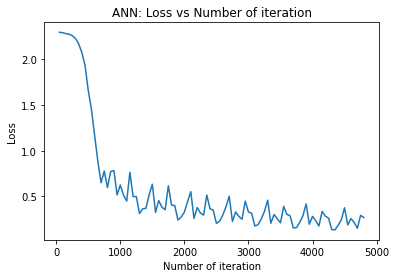

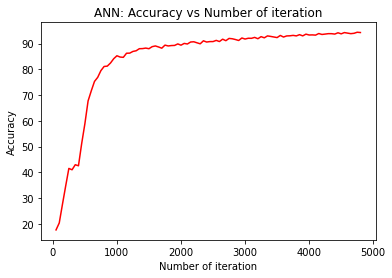

In [5]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()